# Anchor Viewer

Interactive viewer for anchor database.

**Features:**
- Browse all anchors with metadata
- Visualize all observations for any anchor
- See masks, crops, descriptions, and frames

## 1. Imports

In [41]:
import sys
import pickle
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

# Add src to path
src_dir = Path.cwd()
if str(src_dir) not in sys.path:
    sys.path.insert(0, str(src_dir))

from vizenc_utils.visualization import visualize_anchor
from vizenc_utils.anchors import get_anchor_summary

print("Modules loaded!")

Modules loaded!


## 2. Configuration

In [42]:
# Project paths
projectDir = Path.cwd().parent
dataDir = projectDir / "data/scand_spot_cafe-2/output_frames"
outputDir = projectDir / "src/output"

# Where to load anchor_db and mask_db from
# (You need to save these from all-in-one.ipynb first)
anchor_db_path = outputDir / "anchor_db.pkl"
mask_db_path = outputDir / "mask_db.pkl"

print(f"Project dir: {projectDir}")
print(f"Data dir: {dataDir}")
print(f"Anchor DB: {anchor_db_path}")
print(f"Mask DB: {mask_db_path}")

Project dir: /home/denis_fatykhov/Projects/vizEnc
Data dir: /home/denis_fatykhov/Projects/vizEnc/data/scand_spot_cafe-2/output_frames
Anchor DB: /home/denis_fatykhov/Projects/vizEnc/src/output/anchor_db.pkl
Mask DB: /home/denis_fatykhov/Projects/vizEnc/src/output/mask_db.pkl


## 3. Load Data

In [43]:
# Load anchor database
if anchor_db_path.exists():
    with open(anchor_db_path, 'rb') as f:
        anchor_db = pickle.load(f)
    print(f"✓ Loaded anchor_db with {len(anchor_db['anchors'])} anchors")
else:
    print(f"✗ File not found: {anchor_db_path}")
    print("  Run all-in-one.ipynb and save anchor_db first!")
    anchor_db = None

✓ Loaded anchor_db with 3 anchors


In [44]:
# Load mask database
if mask_db_path.exists():
    with open(mask_db_path, 'rb') as f:
        mask_db = pickle.load(f)
    print(f"✓ Loaded mask_db with {len(mask_db)} frames")
else:
    print(f"✗ File not found: {mask_db_path}")
    print("  Run all-in-one.ipynb and save mask_db first!")
    mask_db = None

✓ Loaded mask_db with 6 frames


In [45]:
# Load frame paths
frames = sorted(dataDir.glob("frame_*.png"))
# frames = sorted(dataDir.glob("*.jpg"))
print(f"✓ Found {len(frames)} frames in {dataDir}")

✓ Found 33 frames in /home/denis_fatykhov/Projects/vizEnc/data/scand_spot_cafe-2/output_frames


## 4. Browse Anchors

In [46]:
if anchor_db is not None:
    # Get summary
    summary = get_anchor_summary(anchor_db)
    
    print(f"{'='*80}")
    print(f"ANCHOR DATABASE SUMMARY")
    print(f"{'='*80}")
    print(f"Total anchors: {summary['n_anchors']}")
    print(f"Total observations: {summary['total_observations']}")
    print(f"Avg observations per anchor: {summary['avg_observations_per_anchor']:.2f}")
    
    print(f"\nCategories:")
    for cat, count in sorted(summary['categories'].items(), key=lambda x: -x[1]):
        print(f"  {cat}: {count}")
    
    print(f"\n{'='*80}")
    print(f"ALL ANCHORS (sorted by observations)")
    print(f"{'='*80}")
    print(f"{'ID':<6} {'Category':<15} {'Obs':<5} {'Frames':<20} {'Conf':<6} {'Description'}")
    print(f"{'-'*80}")
    
    # Sort by number of observations (descending)
    sorted_track_ids = sorted(
        anchor_db['anchors'].keys(),
        key=lambda tid: anchor_db['anchors'][tid]['n_observations'],
        reverse=True
    )
    
    for track_id in sorted_track_ids:
        anchor = anchor_db['anchors'][track_id]
        frames_str = str(anchor['frames'][:5])  # First 5 frames
        if len(anchor['frames']) > 5:
            frames_str = frames_str[:-1] + ",...]"  # Add ellipsis
        
        desc = anchor['descriptions'][-1]  # Latest description
        if len(desc) > 35:
            desc = desc[:32] + "..."
        
        print(f"{track_id:<6} {anchor['category']:<15} "
              f"{anchor['n_observations']:<5} {frames_str:<20} "
              f"{anchor['avg_confidence']:<6.3f} {desc}")
else:
    print("Cannot browse anchors - anchor_db not loaded!")

ANCHOR DATABASE SUMMARY
Total anchors: 3
Total observations: 15
Avg observations per anchor: 5.00

Categories:
  floorcolumn: 1
  ceiling: 1
  window: 1

ALL ANCHORS (sorted by observations)
ID     Category        Obs   Frames               Conf   Description
--------------------------------------------------------------------------------
0      floorcolumn     10    [4, 4, 5, 5, 6,...]  0.815  floorcolumn: A person standing i...
1      ceiling         4     [4, 5, 8, 9]         0.909  ceiling: A long hallway with lig...
2      window          1     [7]                  1.000  window: A man sitting in a chair...


## 5. Visualize Specific Anchor

Set `track_id` to the anchor you want to visualize:

ANCHOR 0 - FLOORCOLUMN
Observations: 10
Frames: [4, 4, 5, 5, 6, 7, 7, 7, 8, 9]
First seen: frame 4
Last seen: frame 9
Average confidence: 0.815

Descriptions:
  Frame 4: "floorcolumn: People are standing in line in a hallway."
  Frame 4: "window: A blurry picture of a television with a person pointing at it."
  Frame 5: "floorcolumn: A group of people walking down a hallway."
  Frame 5: "wall: A red counter top with a silver edge."
  Frame 6: "floorcolumn: A red counter with a metal top in a room."
  Frame 7: "wall: Two chairs sitting next to each other in front of a wall."
  Frame 7: "floorcolumn: A person sitting at a table in a room."
  Frame 7: "wall: A person sitting at a table in a room."
  Frame 8: "wall: A pair of chairs sitting in front of a wall."
  Frame 9: "floorcolumn: A person standing in front of a counter at a restaurant."



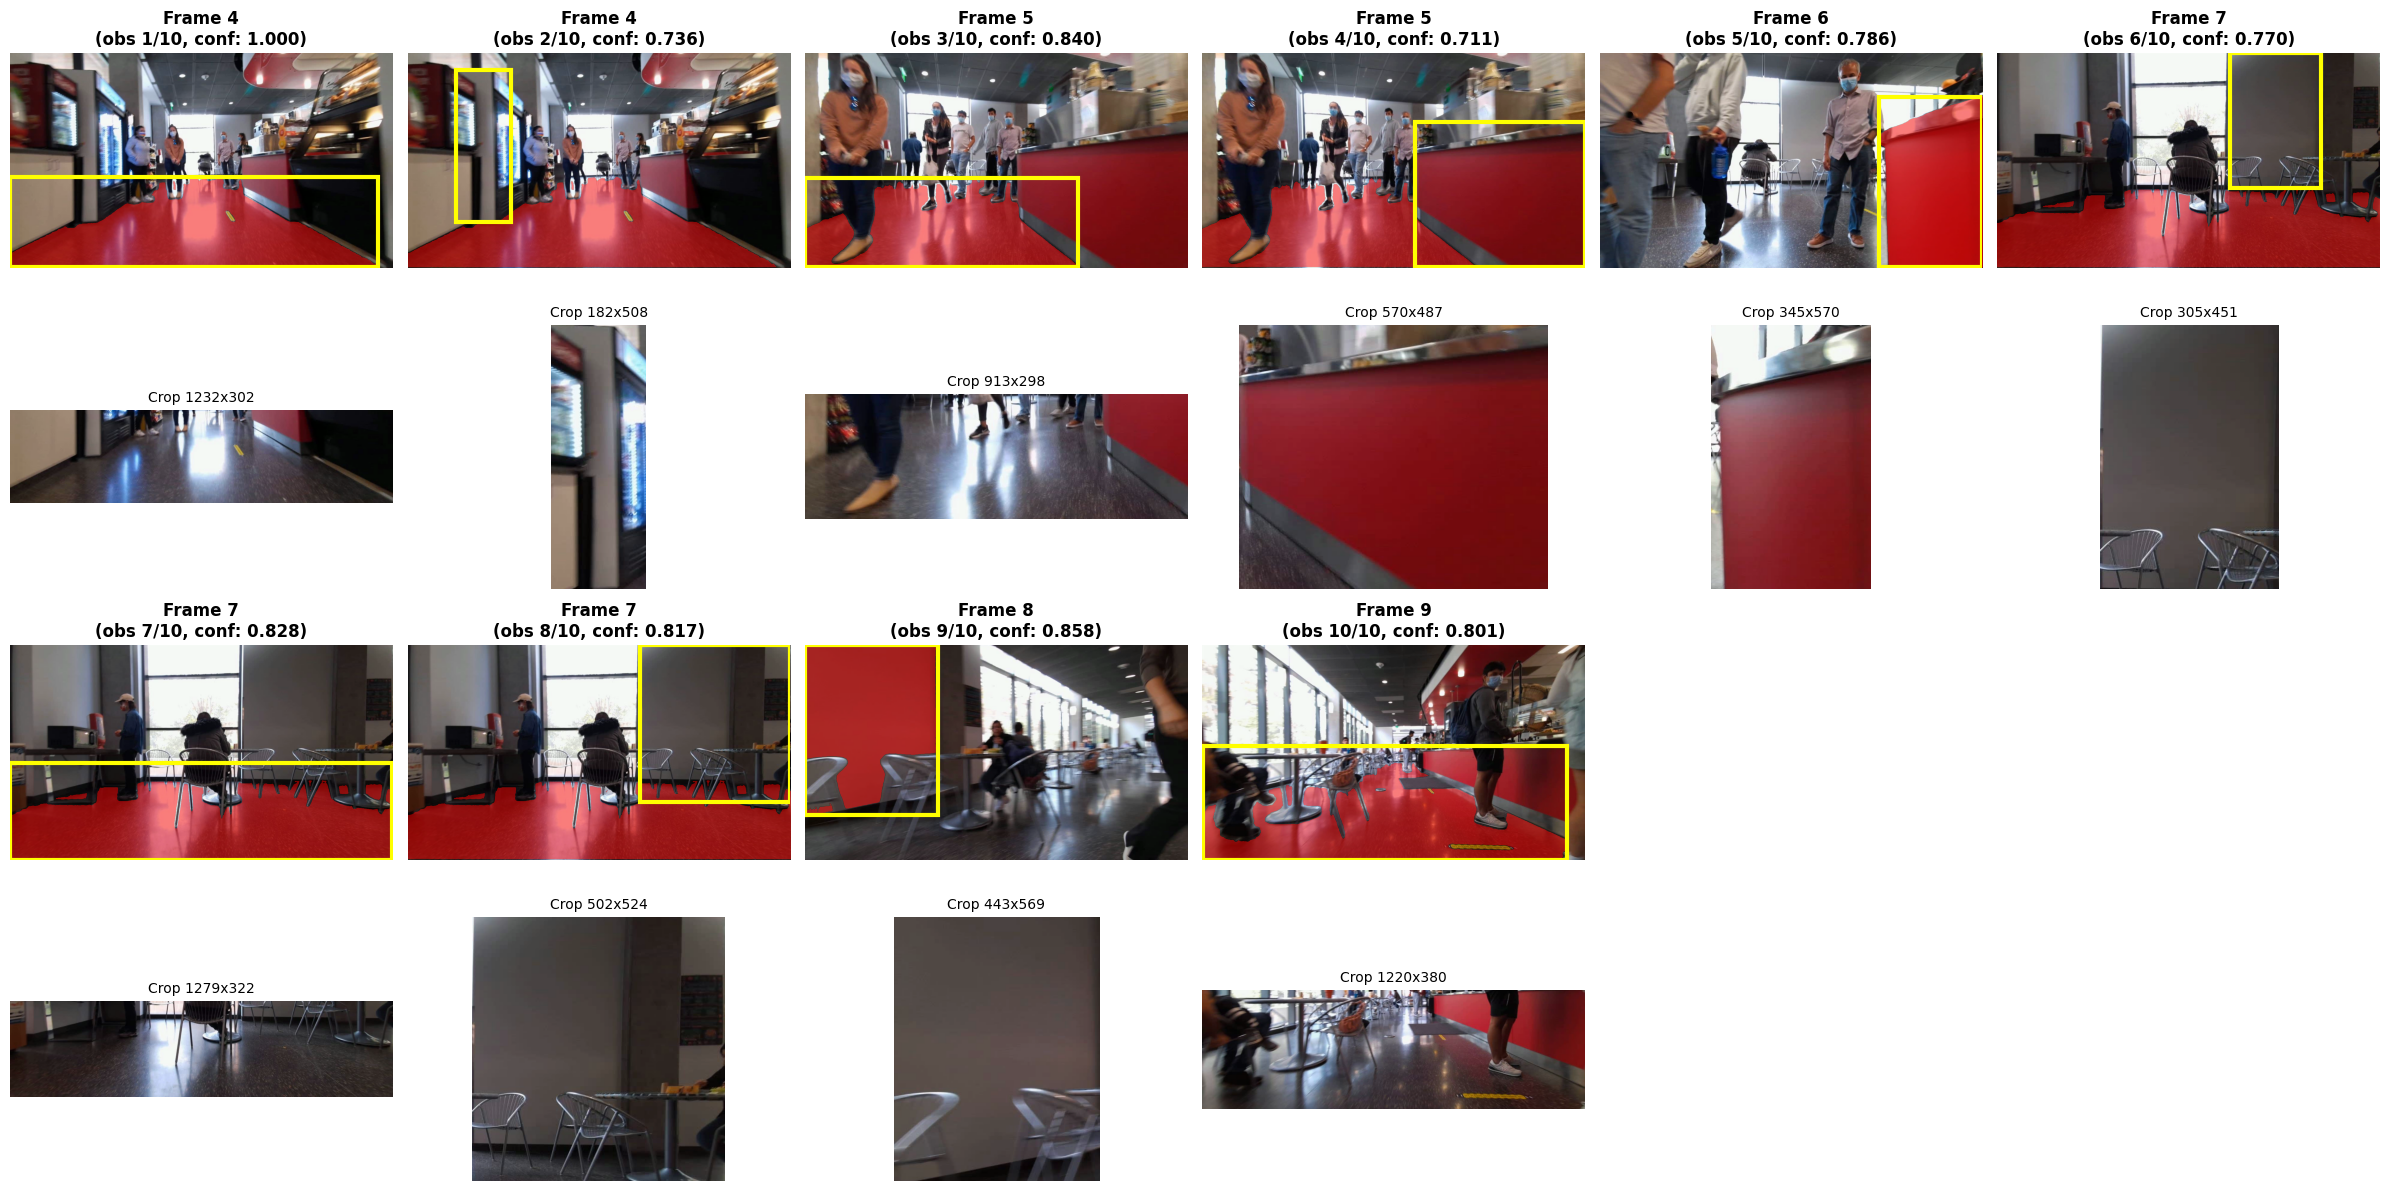

In [53]:
# ========== CHANGE THIS ==========
track_id = 0 # Change to any track_id from the list above
# =================================

if anchor_db is not None and mask_db is not None:
    visualize_anchor(anchor_db, track_id, mask_db, frames)
else:
    print("Cannot visualize - data not loaded!")

## 6. Visualize Multiple Anchors

Visualizing top 3 anchors by observations:

ANCHOR 0 - FLOORCOLUMN
Observations: 10
Frames: [4, 4, 5, 5, 6, 7, 7, 7, 8, 9]
First seen: frame 4
Last seen: frame 9
Average confidence: 0.815

Descriptions:
  Frame 4: "floorcolumn: People are standing in line in a hallway."
  Frame 4: "window: A blurry picture of a television with a person pointing at it."
  Frame 5: "floorcolumn: A group of people walking down a hallway."
  Frame 5: "wall: A red counter top with a silver edge."
  Frame 6: "floorcolumn: A red counter with a metal top in a room."
  Frame 7: "wall: Two chairs sitting next to each other in front of a wall."
  Frame 7: "floorcolumn: A person sitting at a table in a room."
  Frame 7: "wall: A person sitting at a table in a room."
  Frame 8: "wall: A pair of chairs sitting in front of a wall."
  Frame 9: "floorcolumn: A person standing in front of a counter at a restaurant."



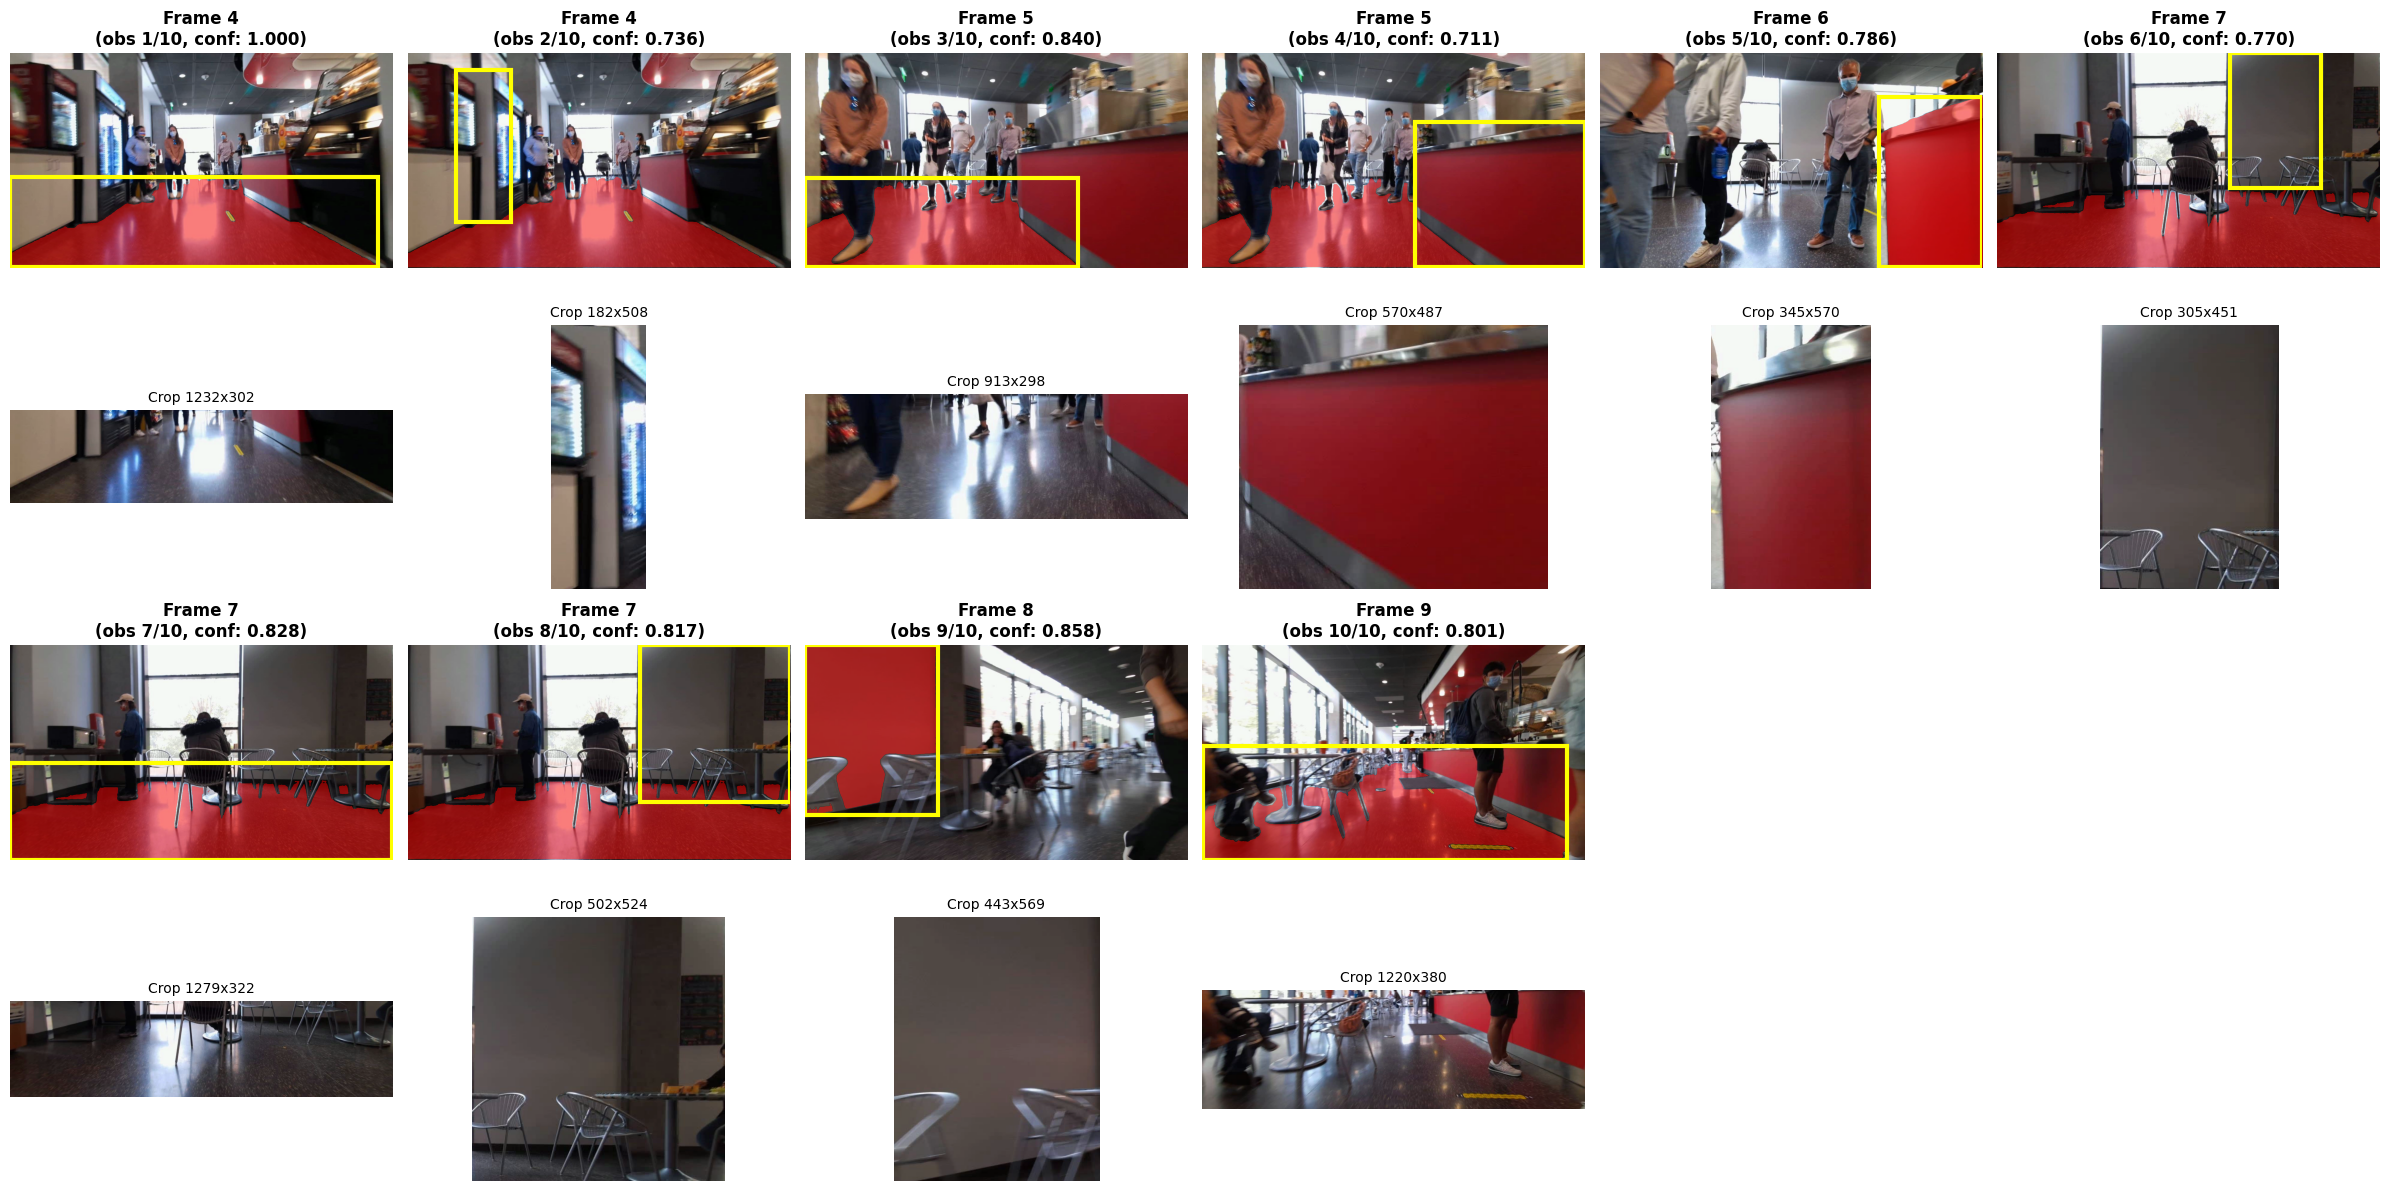

ANCHOR 1 - CEILING
Observations: 4
Frames: [4, 5, 8, 9]
First seen: frame 4
Last seen: frame 9
Average confidence: 0.909

Descriptions:
  Frame 4: "ceiling: A group of people wearing face masks in a room."
  Frame 5: "ceiling: A blurry image of a ceiling with lights."
  Frame 8: "ceiling: A blurry image of a person standing in a room."
  Frame 9: "ceiling: A long hallway with lights on the ceiling."



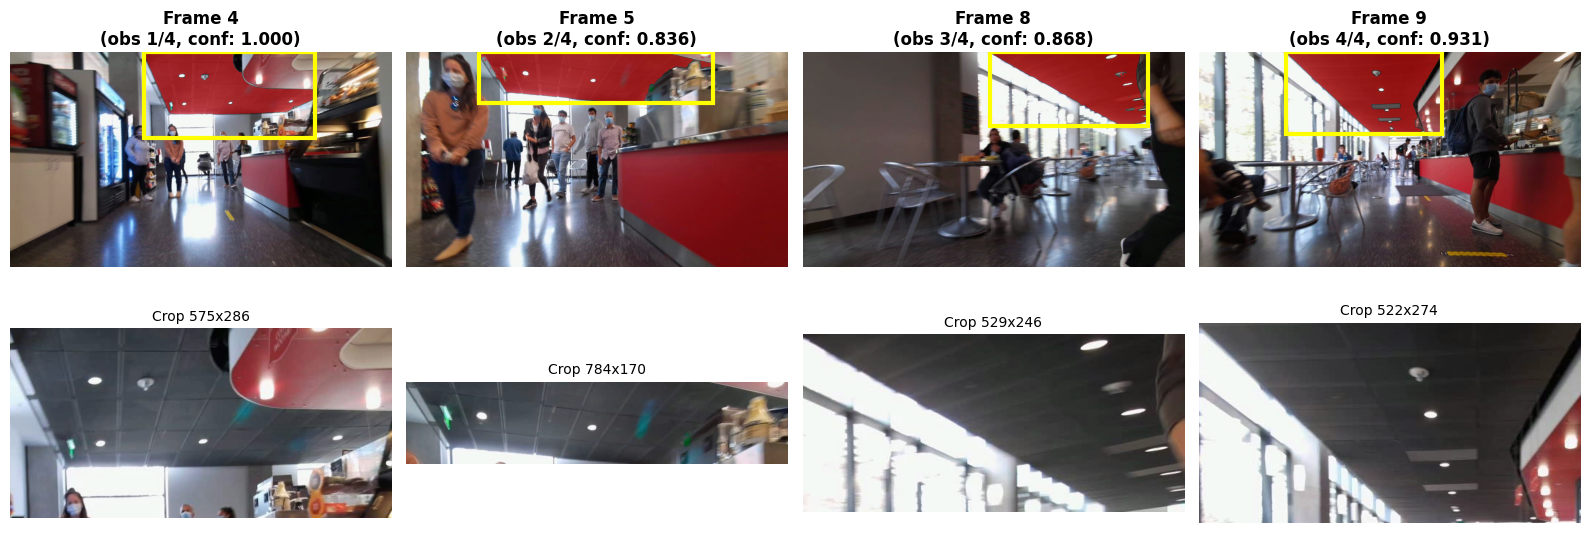

ANCHOR 2 - WINDOW
Observations: 1
Frames: [7]
First seen: frame 7
Last seen: frame 7
Average confidence: 1.000

Descriptions:
  Frame 7: "window: A man sitting in a chair looking out a window."



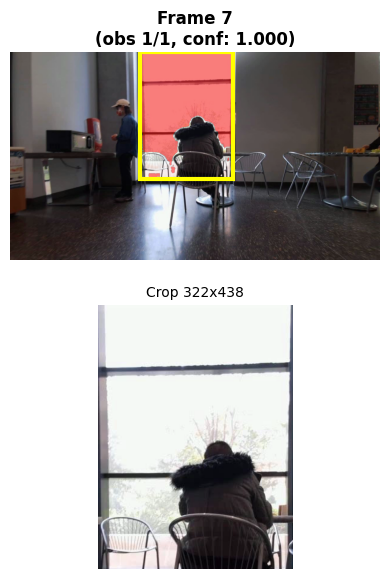

In [48]:
# Visualize top N anchors by observations
N = 3

if anchor_db is not None and mask_db is not None:
    sorted_track_ids = sorted(
        anchor_db['anchors'].keys(),
        key=lambda tid: anchor_db['anchors'][tid]['n_observations'],
        reverse=True
    )
    
    print(f"Visualizing top {N} anchors by observations:\n")
    
    for track_id in sorted_track_ids[:N]:
        visualize_anchor(anchor_db, track_id, mask_db, frames)
else:
    print("Cannot visualize - data not loaded!")

## 7. Filter Anchors by Category

In [49]:
# Show anchors of specific category
category_filter = "building"  # Change to any category from summary

if anchor_db is not None:
    filtered_ids = [
        tid for tid, anchor in anchor_db['anchors'].items()
        if anchor['category'] == category_filter
    ]
    
    print(f"Found {len(filtered_ids)} anchors with category '{category_filter}':\n")
    
    for track_id in sorted(filtered_ids):
        anchor = anchor_db['anchors'][track_id]
        print(f"  Track {track_id}: {anchor['n_observations']} obs, "
              f"frames {anchor['frames']}, conf {anchor['avg_confidence']:.3f}")
        print(f"    \"{anchor['descriptions'][-1]}\"")
else:
    print("Cannot filter - anchor_db not loaded!")

Found 0 anchors with category 'building':



## Summary

This notebook provides interactive viewing of anchor database:

1. **Browse all anchors** - See complete list with metadata
2. **Visualize by ID** - View all observations (masks + crops) for any anchor
3. **Filter by category** - Find anchors of specific object types
4. **Top anchors** - Visualize most frequently observed objects
